## Домашнее задание номер 2

На последнем семинаре мы проанализировали несколько различных морфологических теггеров. Как же узнать, какой использовать? Давайте сравним их качество!

В этой домашке вам будет нужно найти тексты на русском языке (размер корпуса не менее 200 слов), 
в которых  будут какие-то трудные или неоднозначные для POS теггинга моменты и разметить их вручную 
– с помощью этих текстов мы будем оценивать качество работы наших теггеров. В текстах размечаем только части речи, ничего больше!

### 1. Корпус
1. (1 балл) Создание, разметка корпуса и объяснение того, 
почему этот текст подходит для оценки (какие моменты вы тут считаете трудными для автоматического посттеггинга и почему, в этом вам может помочь второй ридинг).
Не забывайте, что разные теггеры могут использовать разные тегсеты: напишите комментарий о том, какой тегсет вы берёте для разметки и почему.

Я, к сожалению, не смог найти ничего смешного, что бы одновременно подходило под условие задачи, поэтому тексты я брал примерно такие же, как в ридинге, а именно: образцы детской речи вот отсюда - "https://www.maam.ru/detskijsad/slovotvorchestvo-v-detskoi-rechi-na-materiale-rechi-detei-ot-3-h-do-7-mi-let.html", предложение с новыми лексемами отсюда - https://ru.wikipedia.org/wiki/Глокая_куздра, стихотворения Велемира Хлебникова, они вообще довольно уникальны оказались в плане словотворчества, стихотворение, в котором много слов со сложными словами и основами, - https://lit-ra.su/stihi-futurizm/moy-vozlyublennyy-kiborg, стихотворение, в котором куча омонимичных слов - https://www.culture.ru/poems/15870/na-prudu и рецепт, в котором есть существующие, но очень экзотические слова - https://www.gastronom.ru/recipe/26289/frittata-de-pazi. Таким образом, все эти случаи более-менее неоднозначные, там теггер, и тем более я, может ошибиться

Поскольку мне было лень заводить отдельный документ, а потом оттуда всё читать, все тексты и ссылки я записал в ячейки. Можно их скипать. Формально они уже записаны в csv, я оставил, чтобы ход моего решения был понятен с самой его задумки

In [1]:
text1 = """Ну она и воручелла у нас! Всегда на нас ворчит!
Мама, давай кошечку пригрудим, а то ведь ей голодновато на улице
У них на даче много порхунов и порхахалей?
Мама вчера весь дом передрыкала"""
ref1 = "https://www.maam.ru/detskijsad/slovotvorchestvo-v-detskoi-rechi-na-materiale-rechi-detei-ot-3-h-do-7-mi-let.html"

In [2]:
text2 = """Чайнело… Мильные бокры
Юлись и дрырлись к поросе,
И глокой куздры развихры
Курдячились по белесе."""
ref2 = "Л.Кэрролл. Алиса за зеркалом. Пер. Е. Клюева"

In [3]:
text3 = """Ты белых лебедей кормила,
Откинув тяжесть черных кос…
Я рядом плыл; сошлись кормила;
Закатный луч был странно-кос.
По небу полосы синели,
Вечеровой багрец кроя;
В цветах черемух и синели
Скрывались водные края.
Все формы были строго-четки,
Миг ранил сердце сотней жал…
Я, как аскет сжимает четки,
В руке весло невольно жал.
Вдруг лебедей метнулась пара…
Не знаю, чья была вина…
Закат замлел за дымкой пара,
Алея, как поток вина.
Была то правда ли, мечта ли, —
Уста двоих слились в одно.
Две лодки, как и мы, мечтали,
Как будто вонзены во дно.
Я свято помню эту встречу:
Пруд, берег, неба яркий плат…
Миг тот же если вновь я встречу, —
И жизнь ничтожная из плат!"""
ref3 = "В. Брюсов. На пруду"

In [4]:
text4 = """О, рассмейтесь, смехачи!
О, засмейтесь, смехачи!
Что смеются смехами, что смеянствуют смеяльно,
О, засмейтесь усмеяльно!
О, рассмешищ надсмеяльных – смех усмейных смехачей!
О, иссмейся рассмеяльно, смех надсмейных смеячей!
Смейево, смейево,
Усмей, осмей, смешики, смешики,
Смеюнчики, смеюнчики.
О, рассмейтесь, смехачи!
О, засмейтесь, смехачи!"""
ref4 = "В. Хлебников. Заклятие смехом"

In [5]:
text5 = """Мой возлюбленный Киборг! Я хочу быть с тобой!
В электросатисфакции целовать твоё тело стальное
Мой возлюбленный киборг! Вижу в твоём теле огонь.
Как трансформатор сердце гудит — электронное и живое!

Электричество насквозь в организме расцветает,
Я дышу, как Смерть в тумане, превращаясь в чистый лист.
В небесах моей судьбы пеплом-снегом дух спадает
Искра Божья как звезда озаряет футуризм.

Снова зачат в электроне, тело Киборга живое
Окружает сталью дух, в сердце взрыв мотора стук.
Электричество — мой друг, я в него давно влюблён
И теперь всецело в кибер, в электроны погружён.

Я познал себя во всём, что касается белка,
А теперь мой дух- нейрон и нейтрино — душа моя
Разум — цифровой аналог, в сердце-ток и пустота,
Эры кибердемиургов надвигается заря!

А любовь моя проста — это киберкрасота,
Виртуальная нирвана раскрывает мне Врата
В бесконечную миграцию сквозь познание себя,
И в глазах импринтинг звёздный — детонирующая пустота!

Там любовь свою я встретил, — Звезду трудно не заметить!

Роскошная девушка из лучших металлических сплавов
Её тело — квинтенсенция межгалактических металлов,
В её духе — латентная детонация унивёрсума,
В сердце — мощнейший процессор, в глазах — тайна звёздная.
"""
ref5 = "https://lit-ra.su/stihi-futurizm/moy-vozlyublennyy-kiborg"

In [6]:
text6 = """Фриттата, в переводе с ладино – языка сефардских евреев, означает «тушеная». Пази – мангольд, листовая свекла.
Это очень простое блюдо пришло из жарких стран, и сейчас оно особенно популярно у иерусалимских сефардских хозяек, которые
начинают его готовить в Песах, а последние фриттаты подают на стол уже в конце осени – в Суккот. В знойную погоду она
насыщает, но не оставляет ощущения тяжести."""
ref6 = "https://www.gastronom.ru/recipe/26289/frittata-de-pazi"

Части речи я размечал так: брал по 50 объектов из датафрейма, пристально смотрел и назначал тег. Не претендую на истинность, опирался прежде всего на интуцицию. Тегсет я выбрал от пайморфи, потому что он 1) достаточно простой, остальные сложнее, потом их придётся приводить к моему и, очевидно, редуцировать что-то проще, 2) вполне компактный, основные категории в нём кодируются одной буквой, я и так устал всё это писать. Опять же, привожу полными списками для ясности того, как я всё делал

In [7]:
pos1 = ["PART", "SPRO", "INTJ", "S", "PR", "SPRO", "ADV", "PR", "SPRO",
       "V", "S", "V", "S", "V", "CONJ", "CONJ",
      "PART", "SPRO", "ADV", "PR", "S", "PR", "SPRO", "PR",
      "S", "ADV", "S", "CONJ", "S", "S", "ADV",
      "APRO", "S", "V", "V", "A", "S",
      "V", "CONJ", "V", "PR", "S", "CONJ", "A", "S",
      "S", "V", "PR", "S", "SPRO"]

In [8]:
pos2 = ["A", "S", "V", "V", "S", "A", "S", "SPRO", "ADV", "V", "V", "S", "A",
       "S", "V", "A", "PR", "S", "S", "V",
       "A", "S", "V", "PR", "S", "S", "CONJ",
       "S", "V", "A", "S", "APRO", "S", "V",
       "A", "S", "V", "S", "NUM", "S", "SPRO",
       "ADVPRO", "S", "V", "S", "PR", "S", "S",
       "ADV", "V"]

In [9]:
pos3 = ["ADV", "S", "V", "S", "PART", "V", "APRO",
       "V", "S", "S", "V", "PR", "S", "S",
       "V", "ADVPRO", "S", "S", "V", "SPRO", "S", "PART",
       "S", "PART", "", "S", "NUM", "V", "PR", "NUM",
       "NUM", "S", "ADVPRO", "CONJ", "SPRO", "V", "ADVPRO", "PART",
       "V", "PR", "S", "SPRO", "ADV", "V", "APRO", "S",
       "S", "S", "S", "A"]

In [10]:
pos4 = ["S", "S", "APRO", "PART", "CONJ", "ADV", "SPRO", "V", "",
       "CONJ", "S", "A", "PR", "S", "INTJ", "V", "S", "INTJ", "V", "S", "CONJ", "V",
       "S", "CONJ", "V", "ADV", "INTJ", "V",
       "ADV", "INTJ", "S", "A", "", "S",
       "ADV", "S", "INTJ", "V", "ADV", "S",
       "A", "S", "ADV", "ADV", "V",
       "V", "S", "S", "S", "S"]

In [11]:
pos5 = ["INTJ", "V", "S", "INTJ", "V", "S",
       "APRO", "A", "S", "SPRO", "V", "V", "PR",
       "SPRO", "PR", "S", "V", "APRO", "S",
       "A", "APRO", "A", "S", "V", "PR", "APRO",
       "S", "S", "ADVPRO", "S", "S", "V", "",
       "A", "CONJ", "A", "S", "ADV", "PR",
       "S", "V", "SPRO", "V", "ADVPRO", "S", "PR",
       "S", "V", "PR", "A"]

In [12]:
pos6 = ["S", "PR", "S", "APRO", "S", "S", "S",
       "V", "S", "A", "ADVPRO", "S", "V",
       "S", "ADV", "V", "PR", "S", "S",
       "S", "A", "V", "S", "S", "PR", "S",
       "S", "S", "S", "S", "","APRO", "S",
       "SPRO", "PR", "SPRO", "ADV", "V", "CONJ", "ADV", "ADV",
       "PR", "S", "PR", "S", "V", "SPRO", "V",
       "SPRO", "PR"]

In [13]:
pos7 = ["SPRO", "CONJ", "V", "S", "CONJ", "ADV", "APRO", "S",
       "S", "CONJ", "S", "", "S", "S", "S", "",
       "A", "S", "PR", "S", "CONJ", "S", "S",
       "S", "V", "S", "CONJ", "S", "APRO",
       "A", "", "SPRO", "S", "A", "S",
       "V", "SPRO", "S", "PR", "A", "S",
       "ADV", "S", "SPRO", "CONJ", "PR", "S", "S",
       "A", ""]

In [14]:
pos8 = ["A", "S", "ADV", "S", "APRO", "SPRO",
       "V", "", "S", "ADV", "PART", "V",
       "A", "S", "PR", "A", "A", "S",
       "APRO", "S", "", "S", "A",
       "S", "PR", "APRO", "S", "","A", "S",
       "S", "PR", "S", "", "A", "S", "PR",
       "S", "", "S", "A", "S", "PR", "S",
       "PR", "S", "", "S", "A", "S",]

In [15]:
pos9 = ["V", "A", "S", "", "S", "A", "S", "SPRO", "ADV", "A", "S", "V", "PR",
        "A", "S", "CONJ", "ADV", "SPRO", "ADV", "A",
        "PR", "A", "A", "S", "CONJ",
        "V", "SPRO", "V", "PR", "S", "CONJ", "A",
        "S", "V", "PR", "S", "A", "PR", "S", "S",
        "", "PR", "S", "PR", "A", "S", "SPRO", "V",
        "CONJ", "PART", "V", "S", "S"]

In [16]:
pos = pos1+pos2+pos3+pos4+pos5+pos6+pos7+pos8+pos9

Затем я их все разбил на токены (пока что необработанные, потому что для морфоанализа мне леммы не нужны) и составил их список. Источники просто собрал в список

In [17]:
texts = map(lambda x: x.split(), [text1, text2, text3, text4, text5, text6])
sources = [ref1, ref2, ref3, ref4, ref5, ref6]

Текст я доставал в несколько этапов. Сначала делал датафрейм, в котором указывал ссылку на источник и необработанный текст

In [18]:
import pandas as pd
from tqdm import tqdm
df = pd.DataFrame({"source": sources, "text": texts})

Копировал текст в колонку токенов, потому что потом токены я получу через explode, а текст пригодится отдельно

In [19]:
df["token"] = df.text
df = df.explode("token")

Каждый токен и каждый текст прогонял через токенайзер, чтобы избавиться от знаков препинания, привести всё к нижнему регистру и всё прочее. Для токенов просто применял функцию, для текста склеивал его обратно, он мне потом пригодится

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pymorphy2
import string
import re

morph = pymorphy2.MorphAnalyzer()
# беру только буквы, без цифр
tokenizer = RegexpTokenizer(r'[^\d\W]+')
russian_stopwords = stopwords.words("russian")

In [21]:
def get_token(x):
    token = tokenizer.tokenize(x)
    return token[0] if token else ""

In [22]:
df["text"] = df.text.apply(lambda x: " ".join(get_token(y.lower()) for y in x))
df["token"] = df.token.apply(lambda x: get_token(x.lower()))

Специально выношу индексы, потому что по ним я потом буду клеить колонки, чтобы пощадить свой рассудок в будущем и не издеваться с merge. Если честно, по-моему я это делал как раз, чтобы мёрдж был как надо, но потом от него вообще избавился, а код остался. Но я считаю, что, как говорится, не надо чинить не сломанное. В любом случае это не тот код, который надо постоянно запускать, когда уже есть готовый датафрейм

In [23]:
df = df.reset_index(drop=True)

Части речи уже мною размечены, каждое слово точно сопоставлено, можно присоединять без проблем. Те, которые не имеют части речи, можно выкидывать

In [24]:
df["pos"] = pd.Series(pos)
df = df[df.pos != ""]

In [25]:
df.to_csv("pos.csv", index=0)
df = df.reset_index()

Вот так выглядел датафрейм после махинаций. Не очень красиво, надо бы закодировать текст и источники, можно через LabelEncoder, запихнуть их в отдельную БД, но мне было лень, это всё равно промежуточный этап

In [26]:
df

,index,source,text,token,pos
0,0,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,ну,PART
1,1,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,она,SPRO
2,2,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,и,INTJ
3,3,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,воручелла,S
4,4,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,у,PR
...,...,...,...,...,...
431,448,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,но,CONJ
432,449,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,не,PART
433,450,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,оставляет,V
434,451,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,ощущения,S


### 2. Теггинг
2. (3 балла) Потом вам будет нужно взять три  POS теггера для русского языка (udpipe, stanza, natasha, pymorphy, mystem, spacy, deeppavlov) и «прогнать» текст через каждый из них.

Сперва я хотел разобраться с наташей. К сожалению, с ней возникает проблема, ведь она учитывает контекст, поэтому нужно парсить весь текст, для этого я их и сохранял

In [27]:
from natasha import (
    Segmenter,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    MorphVocab,
    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)

In [28]:
natasha = pd.DataFrame(columns=["token", "natasha"])

for text in df.text.unique():

    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    natasha = pd.concat([natasha, pd.DataFrame([{"token": x.text, "natasha": x.pos} for x in doc.tokens])])

За индексами опять же слежу, их должно быть ровно столько же, сколько в основном датафрейме

In [29]:
natasha

,token,natasha
0,ну,PART
1,она,PRON
2,и,PART
3,воручелла,VERB
4,у,ADP
...,...,...
54,но,CCONJ
55,не,PART
56,оставляет,VERB
57,ощущения,NOUN


С майстемом аналогичная история, анализирую весь текст, слежу за индексом

In [30]:
from pymystem3 import Mystem
m = Mystem()
mystem = []

In [31]:
mystem = pd.DataFrame(columns=["token", "mystem"])

for text in df.text.unique():

    ana = m.analyze(text)
    for word in ana:
        if 'analysis' in word:
            gr = word['analysis'][0]['gr']
            pos = gr.split('=')[0].split(',')[0]
            mystem = pd.concat([mystem, pd.DataFrame({"token": [word['text']], "mystem": [pos]})])

In [32]:
natasha = natasha.reset_index(drop=True)
mystem = mystem.reset_index(drop=True)

Ну а pymorphy можно сразу добавлять

In [33]:
df["pymorphy"] = df.token.apply(lambda x: morph.parse(x)[0].tag.POS)

Теперь спокойно объявляю новые колонки

In [34]:
df["natasha"] = natasha.natasha
df["mystem"] = mystem.mystem

Смотрим на число объектов - всё, как надо, значит, всё ок

In [35]:
df

,index,source,text,token,pos,pymorphy,natasha,mystem
0,0,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,ну,PART,PRCL,PART,PART
1,1,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,она,SPRO,NPRO,PRON,SPRO
2,2,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,и,INTJ,CONJ,PART,CONJ
3,3,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,воручелла,S,NOUN,VERB,S
4,4,https://www.maam.ru/detskijsad/slovotvorchestv...,ну она и воручелла у нас всегда на нас ворчит ...,у,PR,PREP,ADP,PR
...,...,...,...,...,...,...,...,...
431,448,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,но,CONJ,CONJ,CCONJ,CONJ
432,449,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,не,PART,PRCL,PART,PART
433,450,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,оставляет,V,VERB,VERB,V
434,451,https://www.gastronom.ru/recipe/26289/frittata...,фриттата в переводе с ладино языка сефардских...,ощущения,S,NOUN,NOUN,S


In [36]:
df.to_csv("pos.csv", index=0)

Осталось сконвертировать всё в тот же формат, что и у меня. Для этого я смотрел на разницу во множествах, вроде бы ничего не упустил. Изменения всегда в сторону упрощения, соответствие должно быть однозначно

In [37]:
convert = {"NPRO" : "SPRO", "NOUN": "S", "PREP": "PR", "ADP": "PR",
              "VERB" : "V", "PRON": "SPRO", "ADJ" : "A", "ADJF" : "A",
              "ADVB": "ADV", "CCONJ": "CONJ", "DET": "APRO", "SCONJ": "CONJ",
              "INFN": "V", "PRTS": "V", "PRCL": "PART", "AUX": "V", "PUNCT": "",
          "ADJS": "A", "GRND": "V", "NUMR": "NUM", None: "", "PRTF": "V",
          "ANUM": "NUM"}


def convert_tag(x):
    return x.apply(lambda y: convert[y] if y in convert else y)


old_cols = ["mystem", "natasha", "pymorphy"]
new_cols = ["mystem_f", "natasha_f", "pymorphy_f"]
cross_cols = [j for i in zip(old_cols, new_cols) for j in i]
df[new_cols] = df[old_cols].applymap(lambda x: convert[x] if x in convert else x)

Вот теперь я отсекаю всё, что мне не нужно и оставляю только токены и результаты работы теггера, до и после конвертации

In [38]:
df[["token", "pos"] + cross_cols].to_csv("clean_pos.csv", index=0)
df = pd.read_csv("clean_pos.csv")

In [39]:
df[["token", "pos"] + cross_cols].head()

,token,pos,mystem,mystem_f,natasha,natasha_f,pymorphy,pymorphy_f
0,ну,PART,PART,PART,PART,PART,PRCL,PART
1,она,SPRO,SPRO,SPRO,PRON,SPRO,NPRO,SPRO
2,и,INTJ,CONJ,CONJ,PART,PART,CONJ,CONJ
3,воручелла,S,S,S,VERB,V,NOUN,S
4,у,PR,PR,PR,ADP,PR,PREP,PR


Совсем итог:

In [40]:
df[["token", "pos"] + new_cols].head(10)

,token,pos,mystem_f,natasha_f,pymorphy_f
0,ну,PART,PART,PART,PART
1,она,SPRO,SPRO,SPRO,SPRO
2,и,INTJ,CONJ,PART,CONJ
3,воручелла,S,S,V,S
4,у,PR,PR,PR,PR
5,нас,SPRO,SPRO,SPRO,SPRO
6,всегда,ADV,ADVPRO,ADV,ADV
7,на,PR,PR,PR,PR
8,нас,SPRO,SPRO,SPRO,SPRO
9,ворчит,V,V,S,V


### 3. Сравнение
3. (2 балла) Затем оценим accuracy для каждого теггера. 
Заметьте, что в разных системах имена тегов и части речи  могут отличаться, – вам надо будет свести это всё к единому стандарту с помощью какой-то функции-конвертера и сравнить с вашим размеченным руками эталоном - тоже с помощью какого-то кода или функции.

Сравнивать можно сразу колонками, попарно. А сконвертировал я в предыдущем пункте, поэтому что мне так показалось логичнее

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
for pos_tagger in ["mystem_f", "natasha_f", "pymorphy_f"]:
    print(f"{pos_tagger[:-2]} accuracy - {accuracy_score(df.pos, df[pos_tagger])}")

mystem accuracy - 0.8899082568807339
natasha accuracy - 0.7844036697247706
pymorphy accuracy - 0.841743119266055


Итого вышло, что mystem самый лучший, но это и неудивительно

### 4. Имплементация
4. (4 балла) Дальше вам нужно взять лучший теггер для русского языка и с его помощью написать функцию (chunker), 
которая выделяет из размеченного текста 3 типа n-грамм, соответствующих какому-то шаблону (к примеру не + какая-то часть речи или NP или сущ.+ наречие и тд) 
В предыдущем дз многие из вас справедливо заметили, что если бы мы могли класть в словарь не только отдельные слова, но и словосочетания, 
то программа работала бы лучше. Предложите 3 шаблона (слово + POS-тег / POS-тег + POS-тег) запись которых в словарь, по вашему мнению, 
улучшила бы качество работы программы из предыдущей домашки. 
Балл за объяснение того, почему именно эти группы вы взяли, балл за создание такого рода чанкера, балл за  за встраивание функции в программу из предыдущей домашки, 
балл за сравнение качества предсказания тональности с улучшением и без (это бонусный одиннадцатый балл).

В качестве паттернов, который могут быть полезны, я взял, очевидно, сочетания с отрицательной частицей. Поскольку она всё-таки довольно уникальна, я выделил её отдельно, думаю, что это не критично, хотя в идеале её бы надо отделять и в приставках. Учитываю, если следующий токен будет наречием, прилагательным или глаголом, считаю, что это таким образом отражает их скор в обратную сторону. Затем можно считать, что слово после сочинительного союза имеет большую важность по сравнению с самым коньюнктом, я не уверен, что это так, это просто предположение. Но с другой стороны бытует мнение, что в русском релевантная информация каким-то образом выделяется. С точки зрения просодии, это верно скорее про финальное слово, чем про начальное. Наконец, можно считать, что частицы стоящие после глаголов (же, будь, ли) как бы усиливают его важность, вопрос лишь насколько, ну тут надо покрутить параметры в любом случае.

Для этого я написал чанкер, который делает список списков, каждый элемент - 1 или 2-грамма, если это 2-грамма, то третьим элементом я специально записываю множитель скора, на него я потом домножу каждый элемент чанка и таким образом учту их более точно.

Сперва в любом случае нужно обработать весь текст обзора, опять же, из-за майстема, так что придётся заново лемматизировать. Для этого я выделил код сверху в отдельную функцию, которая вернёт списочек в формате словаря. Так во-первых удобнее глазу, не нужно думать, за что отвечает какой-то индекс, во-вторых это быстрее, а скорость потом пригодится. Старался написать и максимально коротко, и оптимально по времени, но комментарии везде имеются

In [43]:
def get_token_pos(text):
    """Берёт текст, обрабатывает его майстемом, возвращает пару лемма-часть речи, словарём для читаемости"""
    with Mystem() as m:
        ana = m.analyze(text)
        token_pos = []
        for word in ana:
            if 'analysis' in word and word["analysis"]:
                gr = word['analysis'][0]['gr']
                pos = gr.split('=')[0].split(',')[0]
                token_pos.append({"token": morph.parse(word['text'])[0].normal_form, "pos": pos})
        return token_pos

Строго говоря можно было бы анализ тональность сделать одной сложной функцией и пройтись по леммам один раз, записывать не чанк, а сразу скор, я думаю, понятно, как это реализовать. Итерируюсь таким же образом, обращаюсь точно так же к i-тому токену/позу, но не добавляю в список, а прибавляю скор, домножаю на скор чанка. Но поскольку в задании просили именно написать функцию, которая на эти чанки разбивает, я её и сделал, но надо понимать, что это неэффективно

In [44]:
def get_chunks(text):
    """Берёт исходный текст, извлекает пары токен-часть речи, выделяет из них
    чанки в соответствии с паттернами, возвращает их словари токены-вес чанка"""
    ngrams = []
    i = 0

    # сперва обрабатываю текст, привожу к нижнему регистру без пунктуации
    clean_text = " ".join(tokenizer.tokenize(text))
    # пользуюсь ранней функцией, выделяю часть речи
    token_pos = get_token_pos(clean_text)

    while i < len(token_pos):
        # пока не кончится исходный список лемм
        # в чанке всегда лежит сам токен, если он не был скипнут, но может быть скипнут
        chunk = {"tokens": [token_pos[i]["token"]],"weight": 1}
        # обрабатываю первый паттерн с отрицанием
        if i < len(token_pos)-1:  # при условии, что это не конец списка, иначе ошибка, очевидно
            # проверяю двойным условием свои паттерны, точно так, как и описывал, должно быть понятно
            if (token_pos[i]["token"] == "не") and (token_pos[i+1]["pos"] in ["A", "ADV", "V"]):
                chunk["weight"] = -1  # добавляю вес чанка

            # далее аналогично для двух других паттернов
            elif token_pos[i]["pos"] == "CONJ":
                chunk["weight"] = 1.5
            elif (token_pos[i]["pos"] == "V") and (token_pos[i+1]["pos"] == "PART"):
                chunk["weight"] = 5
            # не смог сократить использование elif, match/case тоже довольно громоздкий

            # тут очень удобно, смотрю на вес чанка, если он не 1, как при одном слове, то добавляю
            # следующее слово в токены, увеличиваю счётчик и пропускаю добавленное слово
            if chunk["weight"] != 1:
                chunk["tokens"].append(token_pos[i+1]["token"])
                i += 1

        # добавляем чанк в список нграм, итерируюсь обыкновенно по i
        ngrams.append(chunk)
        i += 1

    return ngrams

Вот, как это работает на пробном примере

In [45]:
text = "Алкоголь в напитке почти3 не! чувствуется. Также не чувствуется горечи от пива, а бы даже отнесла напиток не к пивному, а больше к коктейлям, и даже подумала бы не."

In [46]:
get_chunks(text)

[{'tokens': ['алкоголь'], 'weight': 1},
 {'tokens': ['в'], 'weight': 1},
 {'tokens': ['напиток'], 'weight': 1},
 {'tokens': ['почти'], 'weight': 1},
 {'tokens': ['не', 'чувствоваться'], 'weight': -1},
 {'tokens': ['также'], 'weight': 1},
 {'tokens': ['не', 'чувствоваться'], 'weight': -1},
 {'tokens': ['горечь'], 'weight': 1},
 {'tokens': ['от'], 'weight': 1},
 {'tokens': ['пиво'], 'weight': 1},
 {'tokens': ['а', 'бы'], 'weight': 1.5},
 {'tokens': ['даже'], 'weight': 1},
 {'tokens': ['отнести'], 'weight': 1},
 {'tokens': ['напиток'], 'weight': 1},
 {'tokens': ['не'], 'weight': 1},
 {'tokens': ['к'], 'weight': 1},
 {'tokens': ['пивной'], 'weight': 1},
 {'tokens': ['а', 'большой'], 'weight': 1.5},
 {'tokens': ['к'], 'weight': 1},
 {'tokens': ['коктейль'], 'weight': 1},
 {'tokens': ['и', 'даже'], 'weight': 1.5},
 {'tokens': ['подумать', 'бы'], 'weight': 5},
 {'tokens': ['не'], 'weight': 1}]

Как видно, всё отделяется, веса назначаются, должно работать

Следующий апргейд, который я хотел сделать, касается списка хороших и плохих слов. Чтобы сделать код почище, можно объединить их в один словарь, просто приписать знак соответствющим весам, правда тогда нужно сделать функцию весов для слов нечётной, благо это несложно, подробности на графике

In [47]:
def get_words(X_train, y_train):
    # слова берутся для тренировочной подвыборки

    # сперва сливаю X и y обратно, чтобы отделить хорошие и плохие отзывы
    concatted = pd.concat([X_train, y_train], axis=1)
    # беру колонку с леммами
    good_words = concatted[concatted.sentiment == 1].processed
    bad_words = concatted[concatted.sentiment == -1].processed

    # суммирую, чтобы получить один большой массив, беру каунтер
    good = Counter(good_words.sum())
    bad = Counter(bad_words.sum())

    # беру разность двух множеств и заново заполняю каунтер,
    # при обычной разности будут вычитаться именно каунты, а я хочу их сохранить
    bad_words = Counter({k: -bad[k] for k in set(bad) - set(good)})
    good_words = Counter({k: good[k] for k in set(good) - set(bad)})

    sent_dict = Counter(good_words, **bad_words)

    return sent_dict

In [48]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# код для красивых графиков
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [49]:
def piece(x):
    # функция весов из дз1, здесь это только правая ветвь
    return 100 * (1/(x**2 + math.e**(-x+11)))

In [50]:
def weight(x):
    # новая функция весов, правая ветвь плюс её отражение по двум осям
    return piece(x) if x > 0 else -piece(-x)

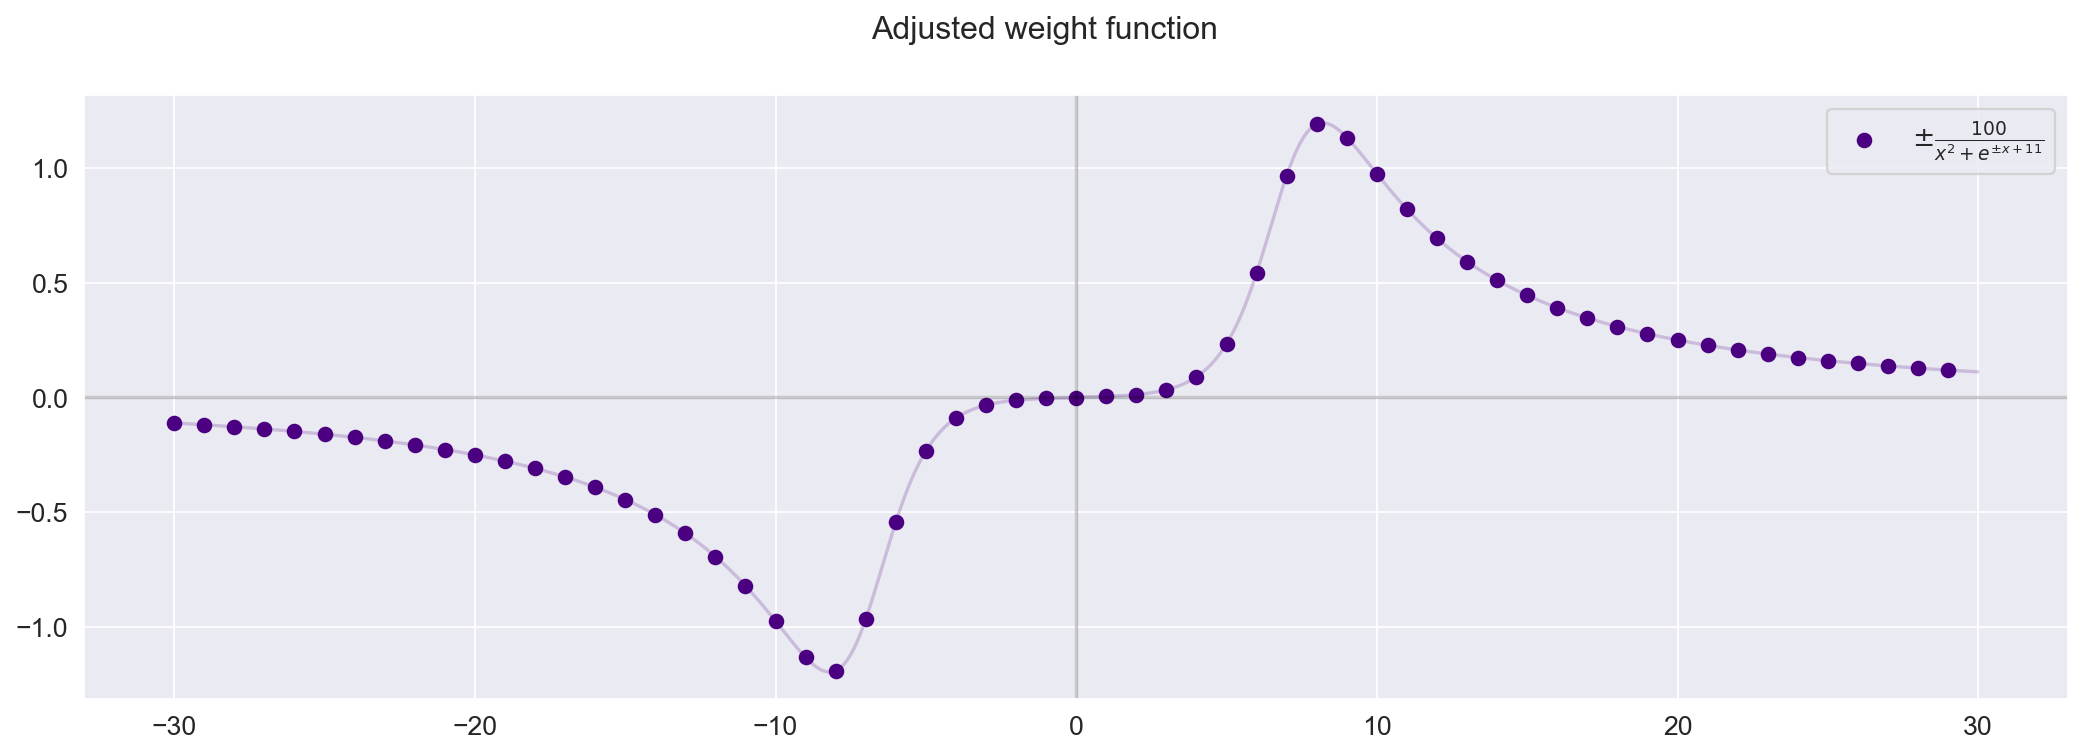

In [51]:
import math
import numpy as np
from matplotlib.pyplot import figure
from collections import Counter
from functools import reduce

figure(figsize=(16, 5), dpi=80)
x_range = range(-30, 30)
x_arange = np.arange(-30, 30, 0.01)

plt.scatter(x_range, [weight(i) for i in x_range], color="indigo",
            label=r"""$\pm{\frac{100}{x^2 + e^{\pm{x}+11}}}$""")
plt.plot(x_arange, [weight(i) for i in x_arange], color="indigo", alpha=0.2)
plt.legend()
plt.axhline(y=0, color='k', alpha=0.2)
plt.axvline(x=0, color='k', alpha=0.2)
plt.suptitle("Adjusted weight function")
plt.show()

И уже теперь можно применять подправленную функцию

In [52]:
def sign(num):
    return -1 if num <= 0 else 1

In [53]:
def weighted_sentiment_prediction(lemmas, sents):
    score = 0

    for lemma in lemmas:
        if lemma in sents:
            score += weight(sents[lemma])

    return sign(score)

In [54]:
def w_pattern_sentiment_prediction(chunks, sents):
    score = 0

    def get_score(x):
        return weight(sents[x]) if x in sents else 0

    for chunk in chunks:
        # суммирую веса каждого слова в токенах, проверяя его в общем словаре
        # тональностей, домножаю на вес чанка, прибавляю к скору
        score += sum(map(lambda x: get_score(x), chunk["tokens"]))*chunk["weight"]

    return sign(score)

Теперь осталось скачать данные, превратить строку в список и начать проверять

In [55]:
import ast
from sklearn.model_selection import train_test_split

data = pd.read_csv("beer_data.csv")
data.processed = data.processed.apply(lambda s: ast.literal_eval(s))

Проверять буду на точно той же выборке, что и раньше

In [56]:
y = data.sentiment
X = data.drop("sentiment", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=671, shuffle=True, test_size=.3)
sent_dict = get_words(X_train, y_train)

Мне нужны только тестовые чанки, модель ничему не учится, как я уже до этого писал в дз1, разве что словарь составляется на трейне. Это долгий процесс, так что придётся подождать

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from tqdm import tqdm

tqdm.pandas()
test_chunks = X_test.text.progress_apply(get_chunks)

 83%|██████████████████████████████████████████████████████████████████              | 302/366 [04:16<00:52,  1.21it/s]

И осталось только посмотреть

In [ ]:
y_pred = X_test.processed.apply(lambda x: weighted_sentiment_prediction(x, sent_dict))
print("До")
print("accuracy", accuracy_score(y_pred, y_test))
print("roc", roc_auc_score(y_pred, y_test))

In [ ]:
y_pred = test_chunks.apply(lambda x: w_pattern_sentiment_prediction(x, sent_dict))
print("После")
print("accuracy", accuracy_score(y_pred, y_test))
print("roc", roc_auc_score(y_pred, y_test))

Как видно, что-то где-то работает, стало чуть-чуть получше. Но всё равно учитывается только малая доля биграмм, существенного прироста нет. Не говоря уже о том, что я должен был учесть вообще все возможные биграммы в дз1, потому что и в tfidf, и в w2v я их все брал, так что это всё было довольно бесполезно (